# Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score



In [7]:
pd.options.display.max_columns = None

# Data Collection and Analysis

Loading the dataset

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 - Non-Diabetic

1 - Diabetic

In [14]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: xlabel='Glucose', ylabel='BMI'>

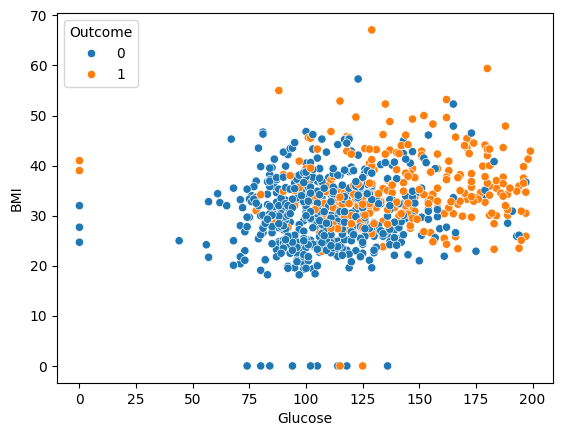

In [16]:
sb.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')

<Axes: xlabel='Outcome', ylabel='count'>

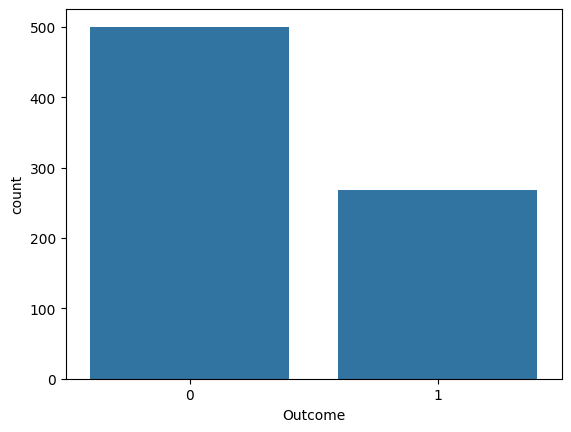

In [18]:
sb.countplot(x="Outcome", data=df)

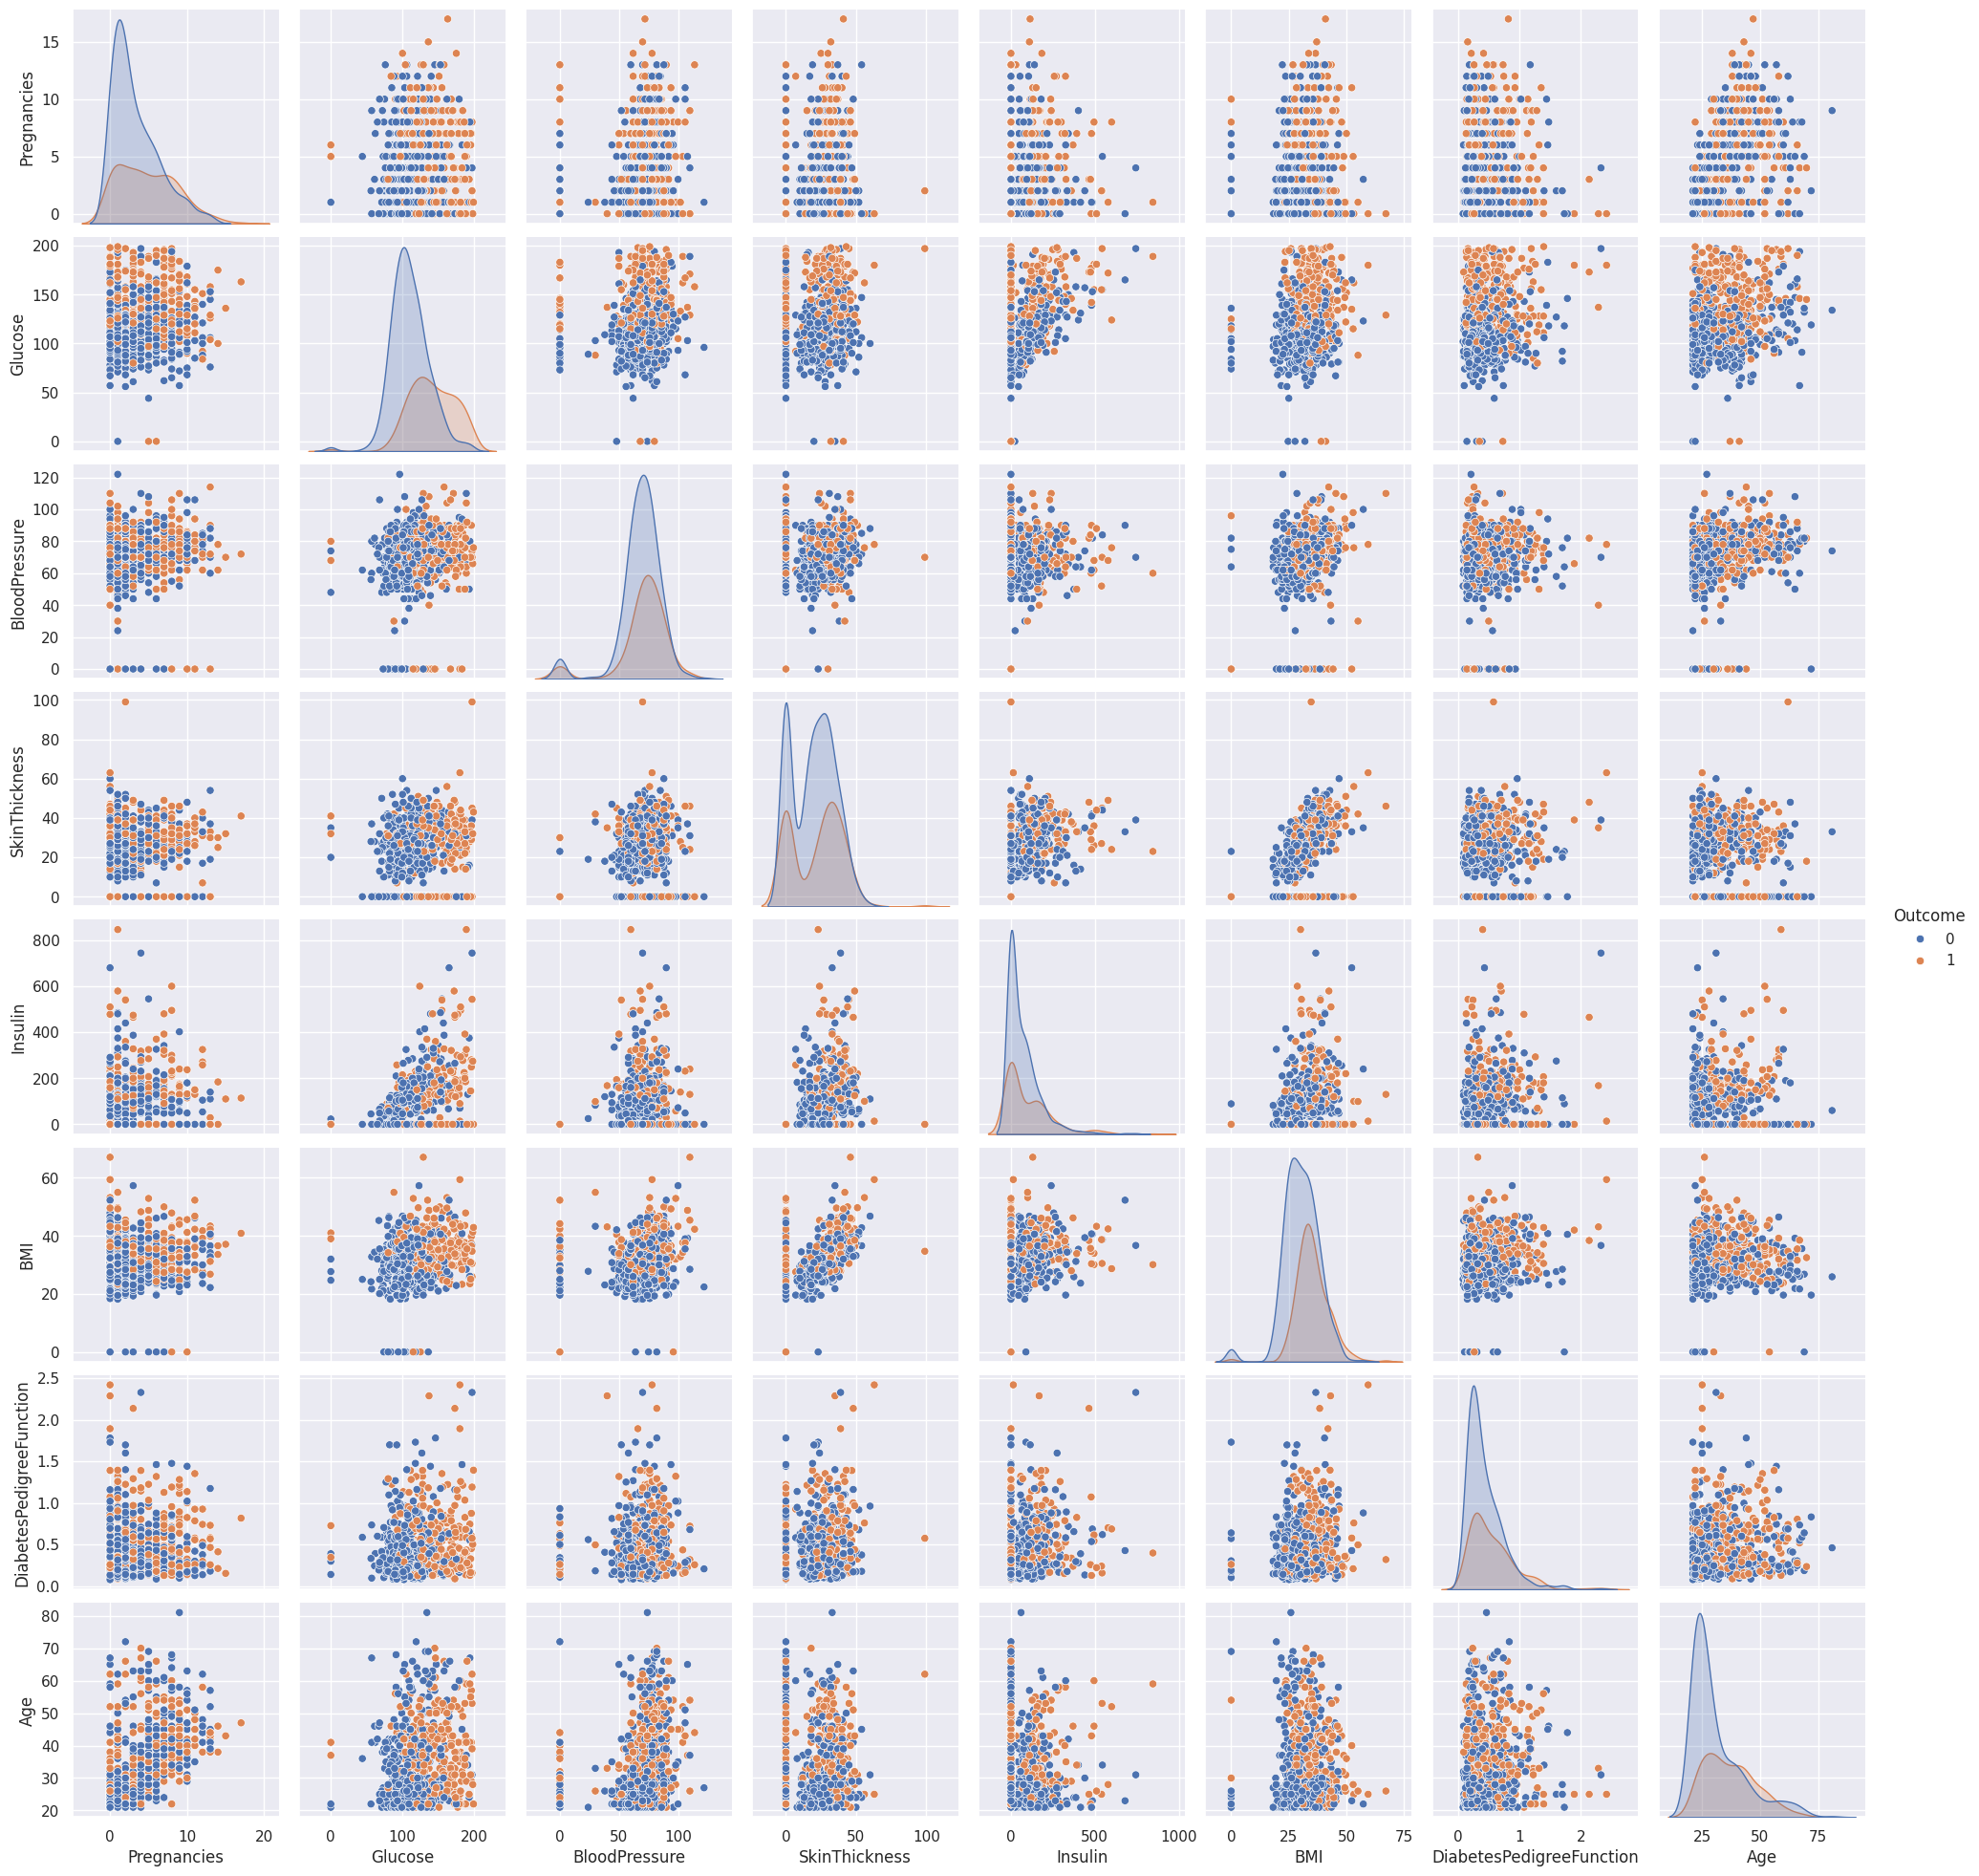

In [20]:
sb.set_theme(rc={'figure.figsize':(11.7,8.27)})
sb.pairplot(data=df, hue='Outcome')

# Training part

In [21]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

In [25]:
# print(X)
# print(y)

Data  Standardization

In [26]:
scaler = StandardScaler()

In [28]:
scaler.fit(X)

StandardScaler()

In [29]:
standard_df = scaler.transform(X)

In [31]:
print(standard_df)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [32]:
X = standard_df

Training and Testing split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y,random_state=42)
# using stratify so that our data divides equally between train and test

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(652, 8) (116, 8) (652,) (116,)


Training the model

In [39]:
svm_m1 = svm.SVC(kernel='linear')

# Training the SVC
svm_m1.fit(X_train, y_train)


SVC(kernel='linear')

Model Evaluation and Preddiction

Accuracy Score

In [42]:
# 1. On training data

X_train_pred = svm_m1.predict(X_train)
X_train_accuracy = accuracy_score(X_train_pred, y_train)


In [43]:
print("Accuracy Score", X_train_accuracy)

Accuracy Score 0.7760736196319018


In [44]:
# 2. On test data

X_test_pred = svm_m1.predict(X_test)
X_test_accuracy = accuracy_score(X_test_pred, y_test)


In [45]:
print("Accuracy Score", X_test_accuracy)

Accuracy Score 0.7327586206896551


Making a Predictive System

In [ ]:
input_data = ()

topred_data = np.asarray(input_data)

topred_data = topred_data.reshape(1,-1)

# Need to standard thhe input_data as our model is trained on standard data

std_data = scaler.transform(topred_data)
print(std_data)

prediction = svm_m1.predict(std_data)
print(prediction)

if(prediction[0] = 0):
  print("He is diabetic")
else:
  print("He is not diabetic")
